/tmp/ipykernel_17059/3295728355.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nepal_data['dateRep'] = pd.to_datetime(nepal_data['dateRep'], dayfirst=True)


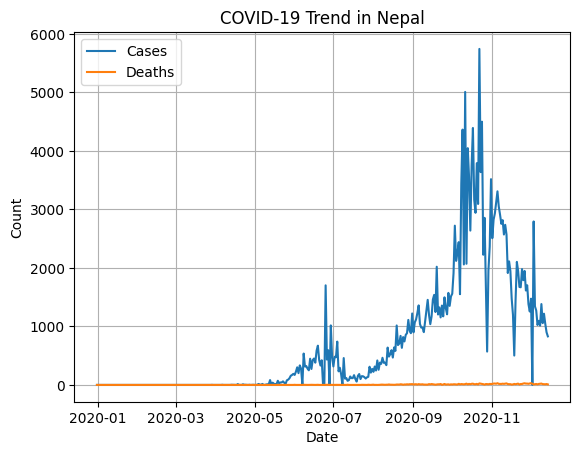

In [1]:
# 1. Line Plot of COVID-19 Trends

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
nepal_data = df[df['countriesAndTerritories'] == 'Nepal']
nepal_data['dateRep'] = pd.to_datetime(nepal_data['dateRep'], dayfirst=True)
nepal_data = nepal_data.sort_values('dateRep')

plt.plot(nepal_data['dateRep'], nepal_data['cases'], label='Cases')
plt.plot(nepal_data['dateRep'], nepal_data['deaths'], label='Deaths')
plt.legend()
plt.title('COVID-19 Trend in Nepal')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()


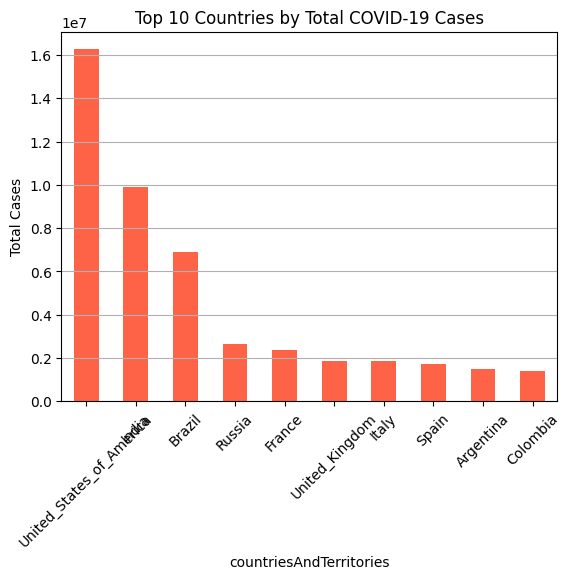

In [2]:
# 2. Top 10 Countries with Most Cases (Bar Plot)

top_countries = df.groupby('countriesAndTerritories')['cases'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='tomato')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


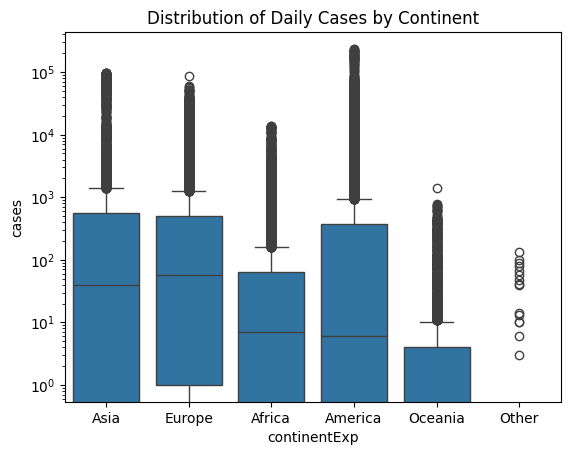

In [3]:
# 3. Compare Continents (Box Plot)

import seaborn as sns
sns.boxplot(x='continentExp', y='cases', data=df)
plt.yscale('log')  # Optional: handle large values
plt.title('Distribution of Daily Cases by Continent')
plt.show()


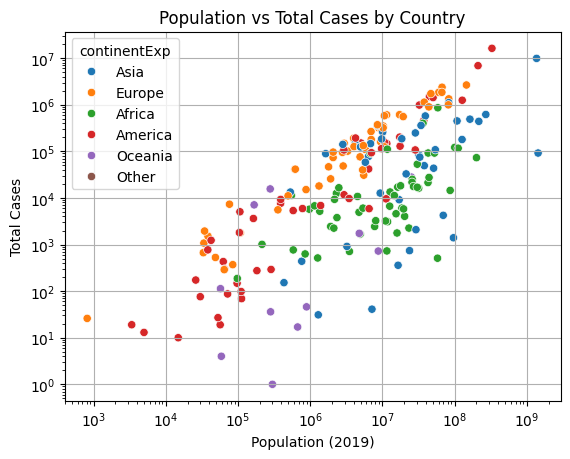

In [4]:
# 4. Population vs Cases (Scatter Plot)

total_cases = df.groupby(['countriesAndTerritories', 'continentExp']).agg({
    'cases': 'sum', 'popData2019': 'first'}).reset_index()
sns.scatterplot(x='popData2019', y='cases', hue='continentExp', data=total_cases)
plt.title('Population vs Total Cases by Country')
plt.xlabel('Population (2019)')
plt.ylabel('Total Cases')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()


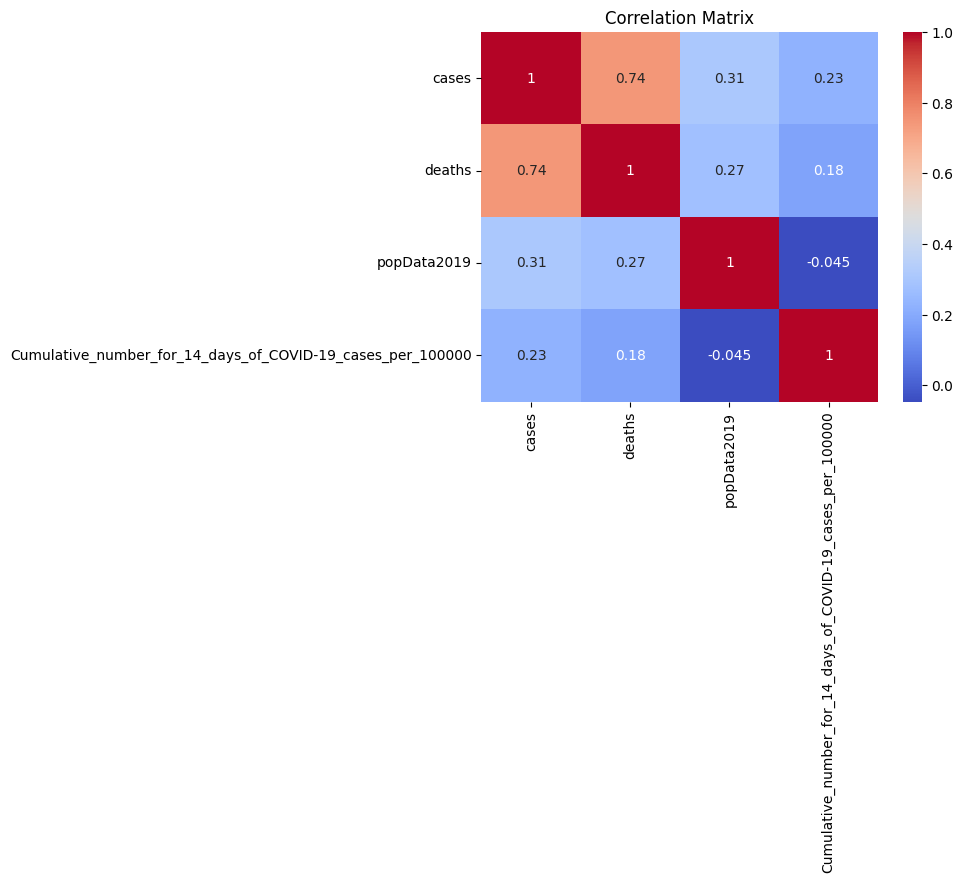

In [5]:
# 5. Heatmap of Correlation Matrix

corr_data = df[['cases', 'deaths', 'popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000']]
corr_matrix = corr_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


/tmp/ipykernel_17059/3879211238.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_deaths.index, y=avg_deaths.values, palette=palette)
/tmp/ipykernel_17059/3879211238.py:5: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=avg_deaths.index, y=avg_deaths.values, palette=palette)


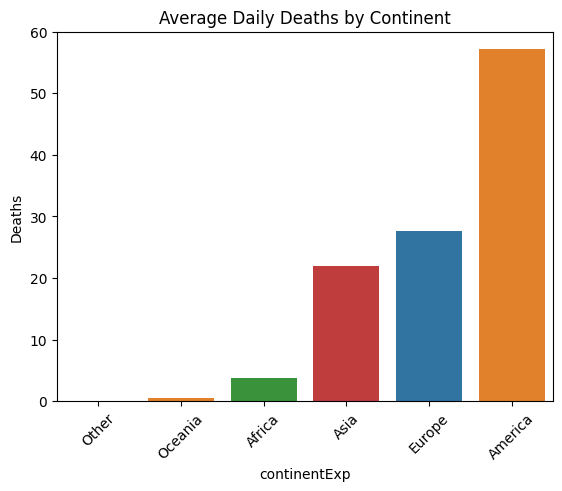

In [6]:
#  6. Custom Color Palette Plot

palette = sns.color_palette(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
avg_deaths = df.groupby('continentExp')['deaths'].mean().sort_values()
sns.barplot(x=avg_deaths.index, y=avg_deaths.values, palette=palette)
plt.title('Average Daily Deaths by Continent')
plt.ylabel('Deaths')
plt.xticks(rotation=45)
plt.show()


In [7]:
# 7. T-test using SciPy

from scipy.stats import ttest_ind

asia = df[df['continentExp'] == 'Asia']['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].dropna()
europe = df[df['continentExp'] == 'Europe']['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].dropna()

t_stat, p_val = ttest_ind(asia, europe)
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -34.46667511850345, P-value: 3.1343652097478254e-255


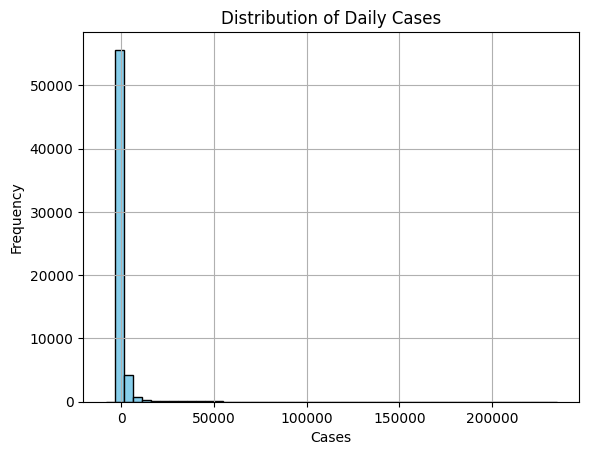

In [8]:
plt.hist(df['cases'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Cases')
plt.xlabel('Cases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


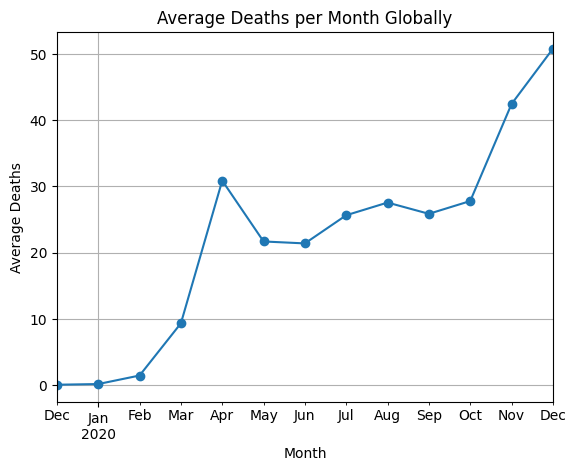

In [9]:
df['month'] = pd.to_datetime(df['dateRep'], dayfirst=True).dt.to_period('M')
monthly_deaths = df.groupby('month')['deaths'].mean()
monthly_deaths.plot(marker='o')
plt.title('Average Deaths per Month Globally')
plt.xlabel('Month')
plt.ylabel('Average Deaths')
plt.grid()
plt.show()


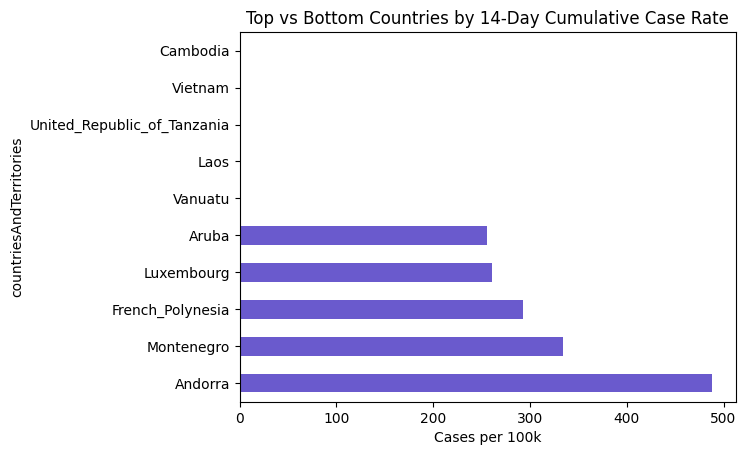

In [10]:
cum_rate = df.groupby('countriesAndTerritories')['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].mean()
top5 = cum_rate.sort_values(ascending=False).head(5)
bottom5 = cum_rate.sort_values().head(5)
compare = pd.concat([top5, bottom5])
compare.plot(kind='barh', color='slateblue')
plt.title('Top vs Bottom Countries by 14-Day Cumulative Case Rate')
plt.xlabel('Cases per 100k')
plt.show()
